In [1]:
%store -r df_pca
%store -r df
%store -r df8

In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.neural_network import MLPClassifier   #Multi-Layer Perceptron Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt     
from sklearn.feature_selection import RFE

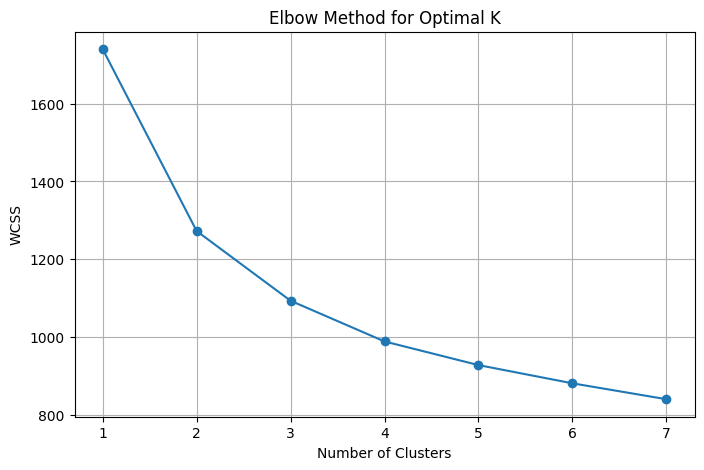

In [6]:
from sklearn.cluster import KMeans


X_unlabeled = df8.drop('target', axis=1)  

# Elbow method
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_unlabeled)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
df8['kmeans_cluster'] = kmeans.fit_predict(X_unlabeled)
df8.head()

,PC1,PC2,PC5,PC6,PC7,PC9,PC10,PC11,target,kmeans_cluster
0,-0.934705,0.208983,0.295308,0.854774,0.460738,-0.720801,0.068016,-0.473150,1,1
1,1.178217,-0.474548,-2.503069,1.252529,-0.727266,0.304813,0.452006,-0.147921,1,0
2,1.795845,-0.335914,-0.614711,0.369755,-0.640217,-0.775945,-0.507854,-0.183852,1,0
3,1.487897,0.275915,0.117819,1.056054,0.420623,-0.031369,-0.776480,-0.262647,1,0
4,0.642607,1.615479,-0.470656,0.328765,-0.041536,0.177160,-0.447931,0.932342,1,2


In [20]:
pd.crosstab(df8['kmeans_cluster'], df8['target'])


target,0,1
kmeans_cluster,,
0,17,78
1,43,30
2,21,53
3,57,4


Analyzing this ,0,2 clusters are healthy while 1,3 are sick

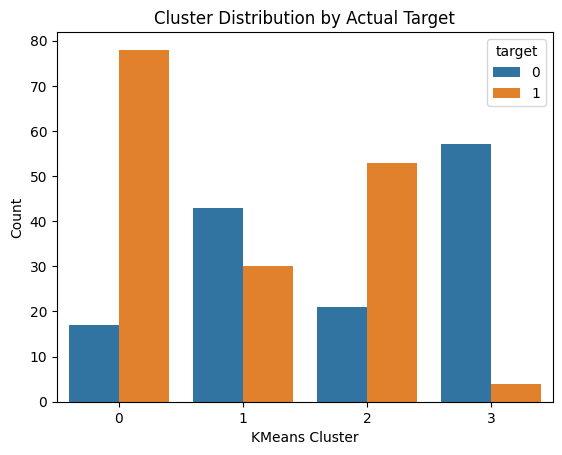

In [24]:
sn.countplot(data=df8, x='kmeans_cluster', hue='target')
plt.title("Cluster Distribution by Actual Target")
plt.xlabel("KMeans Cluster")
plt.ylabel("Count")
plt.show()


In [31]:
# Step 1: Crosstab
ct = pd.crosstab(df8['kmeans_cluster'], df8['target'])

# Step 2: Create a mapping dict (cluster → majority class)
cluster_to_class = ct.idxmax(axis=1).to_dict()

# Step 3: Apply the mapping
df8['mapped_cluster'] = df8['kmeans_cluster'].map(cluster_to_class)

# Step 4: Now compare accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df8['target'], df8['mapped_cluster'])
print("Accuracy after mapping clusters:", accuracy)



Accuracy after mapping clusters: 0.7623762376237624


In [32]:
df8['mapped_cluster'].value_counts()

mapped_cluster
1    169
0    134
Name: count, dtype: int64

In [33]:
df8['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

Hierarchical Clustering (dendrogram analysis). 

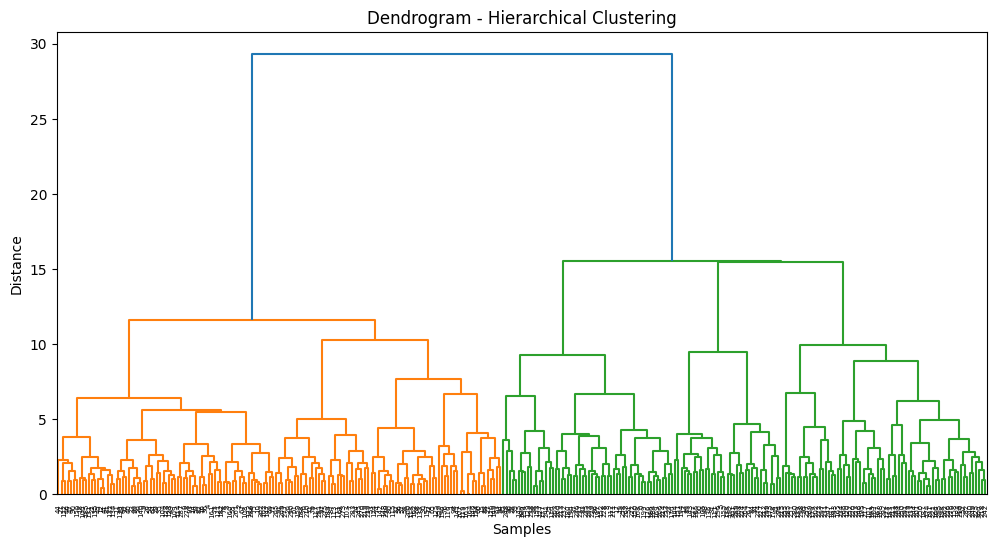

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_unlabeled, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 2, metric='euclidean', linkage='ward')
df8['hierarchical_cluster'] = hc.fit_predict(X_unlabeled)


In [48]:
accuracy = accuracy_score(df8['target'], df8['hierarchical_cluster'])
print("Accuracy after mapping clusters:", accuracy)

Accuracy after mapping clusters: 0.7491749174917491


In [49]:
ct2 = pd.crosstab(df8['target'], df8['hierarchical_cluster'], rownames=['Actual'], colnames=['Hierarchical Cluster'])

print("\nHierarchical Cluster Comparison:\n", ct2)


Hierarchical Cluster Comparison:
 Hierarchical Cluster    0    1
Actual                        
0                     110   28
1                      48  117


In [50]:
%store df8

Stored 'df8' (DataFrame)
